# **CS 675-005  -  GROUP PROJECT: PREDICTING THE VERACITY OF JOB DESCRIPTIONS**

## **Part 1: Exploratory Data Analysis:**

In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset, delete the "job_id" column and replace any missing values in the data with "Not listed"
data = pd.read_csv("fake_job_postings.csv")
data = data.drop(columns=["job_id"])
data = data.replace(np.nan, "Not Listed")

Categorical variables:

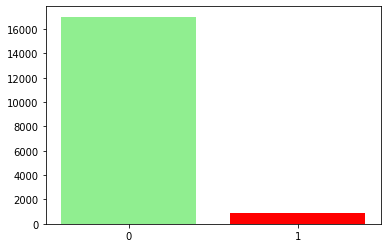

In [ ]:
# Select the "fraudulent" variable and plot its distribution, 
fraudulent = data["fraudulent"].astype(str)
# Plot its distribution, showing "Legitimate" in lightgreen and "Fraudulent" in red
plt.bar(fraudulent.unique(), fraudulent.value_counts(), color = ["lightgreen", "red"])
plt.show()

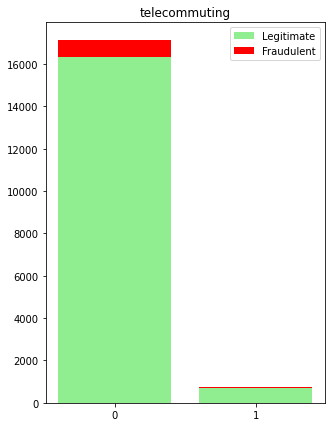

Legitimate:
0    16311
1      703
Name: telecommuting, dtype: int64
Fraudulent
0    802
1     64
Name: telecommuting, dtype: int64


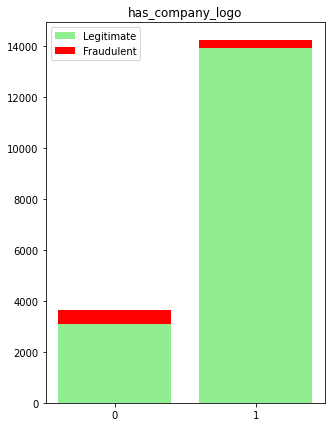

Legitimate:
0     3077
1    13937
Name: has_company_logo, dtype: int64
Fraudulent
0    583
1    283
Name: has_company_logo, dtype: int64


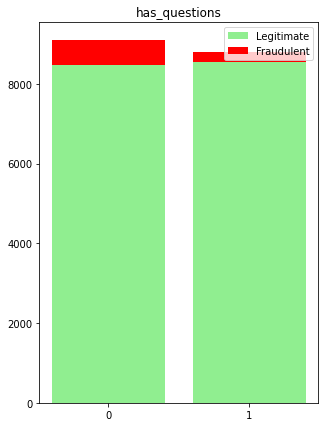

Legitimate:
0    8472
1    8542
Name: has_questions, dtype: int64
Fraudulent
0    616
1    250
Name: has_questions, dtype: int64


In [ ]:
# Create an array of the names of the other binary variables in our dataset
binary_variables = ["telecommuting", "has_company_logo", "has_questions"]

# For each of these binary variables
for variable in binary_variables:
  # Select and find the count of the legitimate postings in each category
  var_0 = data[data["fraudulent"] == 0][variable].astype(str)
  legitimate = var_0.value_counts().sort_index(ascending=True)

  # Do the same for the fraudulent postings
  var_1 = data[data["fraudulent"] == 1][variable].astype(str)
  fraudulent = var_1.value_counts().sort_index(ascending=True)

  # Plot the distribution of the variable
  # Show the legitimate (in green) and fraudulent (in red) postings in each category 
  fig, ax = plt.subplots(figsize=(5, 7))
  ax.bar(["0", "1"], legitimate, label='Legitimate', color = "lightgreen")
  ax.bar(["0", "1"], fraudulent, bottom= legitimate, label='Fraudulent', color = "red")
  ax.set_title(variable)
  ax.legend()
  plt.show()

  # Calculate the percetage of fraudulent postings in each category
  print("Legitimate:")
  print(legitimate)
  print("Fraudulent")
  print(fraudulent)

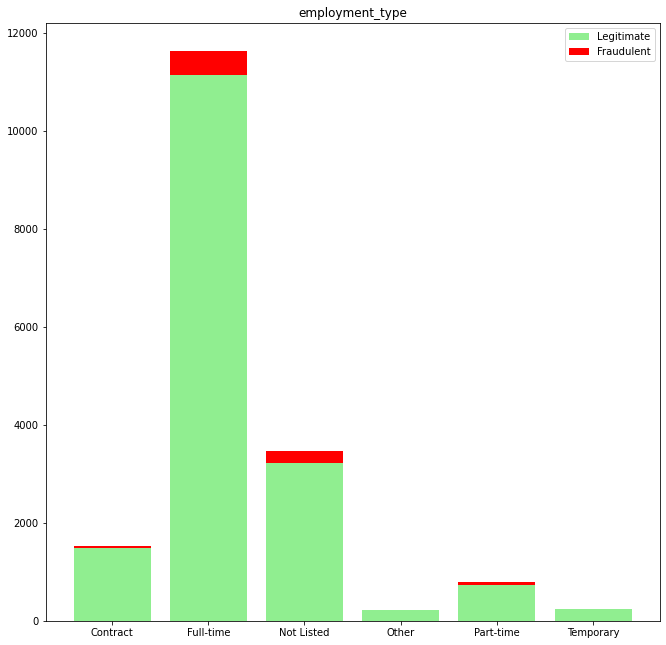

Legitimate:
Contract       1480
Full-time     11130
Not Listed     3230
Other           212
Part-time       723
Temporary       239
Name: employment_type, dtype: int64
Fraudulent
Contract       44
Full-time     490
Not Listed    241
Other          15
Part-time      74
Temporary       2
Name: employment_type, dtype: int64


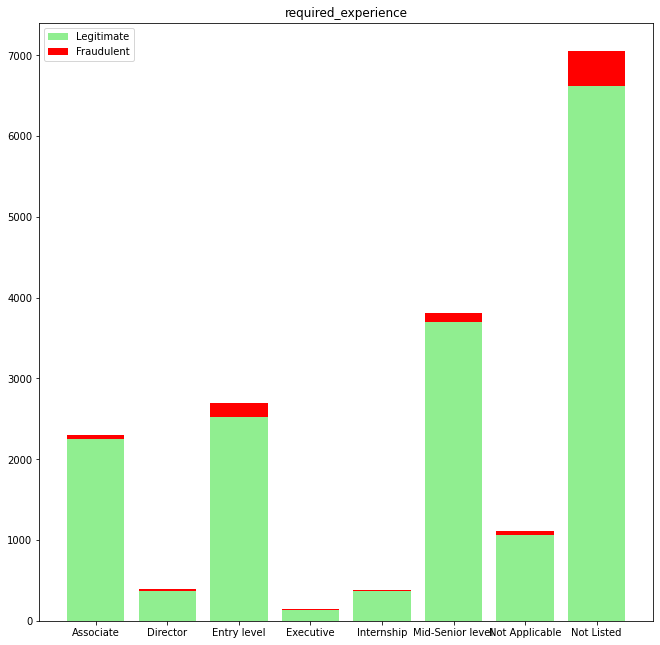

Legitimate:
Associate           2255
Director             372
Entry level         2518
Executive            131
Internship           371
Mid-Senior level    3696
Not Applicable      1056
Not Listed          6615
Name: required_experience, dtype: int64
Fraudulent
Associate            42
Director             17
Entry level         179
Executive            10
Internship           10
Mid-Senior level    113
Not Applicable       60
Not Listed          435
Name: required_experience, dtype: int64


In [ ]:
# Create an array of the names of the desired categorical variables
variables = ["employment_type", "required_experience"]

# For each of these categorical variables
for var in variables:
  # Select and find the count of the legitimate postings in each category
  var_0 = data[data["fraudulent"] == 0][var]
  legitimate = var_0.value_counts().sort_index(ascending=True)
  
  # Do the same for the fraudulent postings
  var_1 = data[data["fraudulent"] == 1][var]
  fraudulent = var_1.value_counts().sort_index(ascending=True)

  # Plot the distribution of the variable
  # Show the legitimate (in green) and fraudulent (in red) postings in each category 
  fig, ax = plt.subplots(figsize=(11, 11))
  ax.bar(sorted(data[var].unique()), legitimate, label='Legitimate', color = "lightgreen")
  ax.bar(sorted(data[var].unique()), fraudulent, bottom= legitimate, label='Fraudulent', color = "red")
  ax.set_title(var)
  ax.legend()
  plt.show()

  print("Legitimate:")
  print(legitimate)
  print("Fraudulent")
  print(fraudulent)

In [ ]:
# Select the location variable and look at its first entries
location = data["location"]
print("Original format")
print(location.head())

Original format
0      US, NY, New York
1        NZ, , Auckland
2         US, IA, Wever
3    US, DC, Washington
4    US, FL, Fort Worth
Name: location, dtype: object


In [ ]:
# Overwrite the location variable with the first two characters of each entry
data["location"] = data["location"].str[0:2]
# Find the number of unique countries
print("# Unique countries", len(data["location"].unique()))
# Find the number of unique countries where there's fraud
print("# Unique countries where there's fraud", len(data[data["fraudulent"] == 1]["location"].unique()))

# Unique countries 91
# Unique countries where there's fraud 21


In [ ]:
# Find how many jobs were posted without specifying department
print("# Jobs posted without department:", len(data[data["department"] == "Not Listed"]))

# Find how many jobs of the posted without specifying department are fraudulent
print("# Fraudulent jobs posted without department:", len(data[(data["department"] == "Not Listed") & (data["fraudulent"] == 1)]))

# Look at the number of unique departments
print("# Unique departments: ", len(data[data["department"] != "Not Listed"]["department"].unique()))

# Jobs posted without department: 11547
# Fraudulent jobs posted without department: 531
# Unique departments:  1337


In [ ]:
# Find the count of the legitimate postings in each category
print("Legitimate")
print(data[data["fraudulent"] == 0]["industry"].value_counts())

# Find the count of the fraudulent postings in each category
print("\nFraudulent")
print(data[data["fraudulent"] == 1]["industry"].value_counts())

# Find out the total number of Oil & Energy Postings
print("\nTotal Oil & Energy")
print(data[(data["industry"] == "Oil & Energy")]["industry"].value_counts())

Legitimate
Not Listed                             4628
Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
                                       ... 
Wine and Spirits                          1
Sporting Goods                            1
Shipbuilding                              1
Alternative Dispute Resolution            1
Military                                  1
Name: industry, Length: 131, dtype: int64

Fraudulent
Not Listed                     275
Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 63, dtype: int64

Total Oil & Energy
Oil &

In [ ]:
# Find the count of the legitimate postings in each category
print("Legitimate")
print(data[data["fraudulent"] == 0]["function"].value_counts())

# Find the count of the fraudulent postings in each category
print("\nFraudulent")
print(data[data["fraudulent"] == 1]["function"].value_counts())

Legitimate
Not Listed                6118
Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Health Care Provider       337
Design                     337
Education                  324
Management                 311
Other                      293
Business Development       215
Human Resources            196
Accounting/Auditing        183
Project Management         173
Finance                    157
Consulting                 140
Writing/Editing            132
Art/Creative               131
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 85
Business Analyst            83
Data Analyst                78
Public Relations            75
Manufacturing               72
General Business            67
Research                    50
Legal                       47
Strategy/Planning           

In [ ]:
# Find the count of the legitimate postings in each category
print("Legitimate")
print(data[data["fraudulent"] == 0]["required_education"].value_counts())

# Find the count of the fraudulent postings in each category
print("\nFraudulent")
print(data[data["fraudulent"] == 1]["required_education"].value_counts())

Legitimate
Not Listed                           7654
Bachelor's Degree                    5045
High School or equivalent            1910
Unspecified                          1336
Master's Degree                       385
Associate Degree                      268
Certification                         151
Some College Coursework Completed      99
Professional                           70
Vocational                             49
Doctorate                              25
Vocational - HS Diploma                 9
Some High School Coursework             7
Vocational - Degree                     6
Name: required_education, dtype: int64

Fraudulent
Not Listed                           451
High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional          

In [ ]:
# Find how many jobs didn't have a salary range
print("# Jobs with no salary range:", len(data[data["salary_range"] == "Not Listed"]))

# Find how many jobs without a salary range are fraudulent
print("# Fraudulent jobs with no salary range:", len(data[(data["salary_range"] == "Not Listed") & (data["fraudulent"] == 1)]))

# Look at some of the salary range values
print("\nSalary range examples:")
data[data["salary_range"] != "Not Listed"]["salary_range"].head(10)

# Jobs with no salary range: 15012
# Fraudulent jobs with no salary range: 643

Salary range examples:


6       20000-28000
10    100000-120000
15    120000-150000
23    100000-120000
31      50000-65000
42      40000-50000
65            60-80
76      65000-70000
77           75-115
79     75000-110000
Name: salary_range, dtype: object

Text variables:

In [ ]:
# Find how many jobs didn't have a title
print("# Jobs with no title:", len(data[data["title"] == "Not Listed"]))

# Jobs with no title: 0


In [ ]:
# Find how many jobs were posted by a company without a profile
print("# Jobs posted by company with no profile:", len(data[data["company_profile"] == "Not Listed"]))

# Find how many jobs posted by a company without a profile are fraudulent
print("# Fraudulent jobs posted by company with no profile:", 
      len(data[(data["company_profile"] == "Not Listed") & (data["fraudulent"] == 1)]))

# Jobs posted by company with no profile: 3308
# Fraudulent jobs posted by company with no profile: 587


In [ ]:
# Create binary version of company_profile:
data["bin_company_profile"] = data["company_profile"]
data.loc[data["bin_company_profile"] == "Not Listed", "bin_company_profile"] = 0
data.loc[data["bin_company_profile"] != 0, "bin_company_profile"] = 1

In [ ]:
# Find how many jobs didn't have a description
print("# Jobs with no description:", len(data[data["description"] == "Not Listed"]))

# Jobs with no description: 1


In [ ]:
# Find for how many jobs didn't have benefits
print("# Jobs with no benefits:", len(data[data["benefits"] == "Not Listed"]))

# Find how many of the jobs with no benefits are fraudulent
print("# Fraudulent jobs no benefits:", len(data[(data["benefits"] == "Not Listed") & (data["fraudulent"] == 1)]))

# Jobs with no benefits: 7210
# Fraudulent jobs no benefits: 364


In [ ]:
# Find how many jobs didn't have requirements
print("# Jobs with no requirements:", len(data[data["requirements"] == "Not Listed"]))

# Find how many of the jobs with no requirements are fraudulent
print("# Fraudulent jobs no requirements:", len(data[(data["requirements"] == "Not Listed") & (data["fraudulent"] == 1)]))

# Jobs with no requirements: 2695
# Fraudulent jobs no requirements: 154


## **Part 2: “Simple” Classifiers + Performance Assessment:**

In [ ]:
# Loading packages required for part 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [ ]:
# Read the dataset, delete the "job_id" column and replace any missing values in the data with "Not listed"
data = pd.read_csv("fake_job_postings.csv")
data = data.drop(columns=["job_id"])
data = data.replace(np.nan, "Not Listed")

In [ ]:
# Create binary version of company_profile:
data["bin_company_profile"] = data["company_profile"]
data.loc[data["bin_company_profile"] == "Not Listed", "bin_company_profile"] = 0
data.loc[data["bin_company_profile"] != 0, "bin_company_profile"] = 1

In [ ]:
# Considering categorical data only
data_cat = data.drop(["title", "company_profile", "description", "requirements", "benefits"], axis = 1)

Considering Binary Categorical data:

In [ ]:
# Considering binary categorical data
data_bin = data_cat[["telecommuting", "has_company_logo", "has_questions", "bin_company_profile", "fraudulent"]]

In [ ]:
# Splitting the inputs and output of the binary categorical data.
X = data_bin.drop(["fraudulent"], axis = 1)
y = data_bin["fraudulent"]

Applying SMOTE and comparing the datasets:

<BarContainer object of 2 artists>

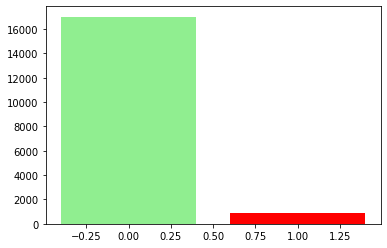

In [ ]:
plt.bar(y.unique(), y.value_counts(), color = ['lightgreen', 'red'])

<BarContainer object of 2 artists>

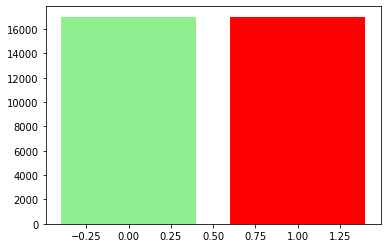

In [ ]:
# Applying SMOTE for the categorical features
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

plt.bar(y_res.unique(), y_res.value_counts(), color = ['lightgreen', 'red'])

In [ ]:
X_res["bin_company_profile"] = X_res["bin_company_profile"].astype(int)

In [ ]:
# Splitting the data into training and testing after applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

#### Logistic Regression on Binary data:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


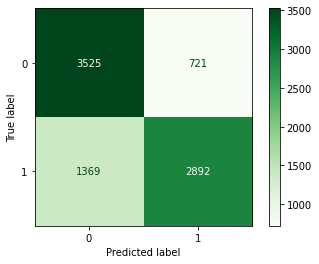

In [ ]:
# Logistic Regression on binary features
log_bin = LogisticRegression(C = 0.01, penalty = 'l2', random_state=50 ,solver = 'liblinear')
log_bin.fit(X_train, y_train)

# Plotting confusion matrix for the binary categorical data after SMOTE applied
plot_confusion_matrix(log_bin, X_test, y_test, cmap = "Greens")

In [ ]:
# Checking the accuracy of the model
accuracy_score(log_bin.predict(X_test), y_test)

0.7543199717879393

#### RandomForest Classifier on Binary categorical features:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.8s finished
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


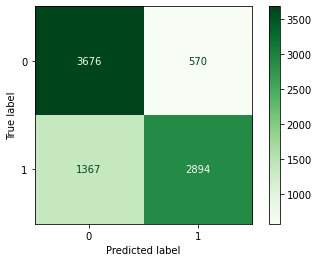

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 1000, 
                             criterion='gini', 
                             max_depth=18, 
                             random_state=0, 
                             verbose=1)
rfc.fit(X_train, y_train)

# Plotting confusion matrix for RandomForest classifier
plot_confusion_matrix(rfc, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(rfc.predict(X_test), y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


0.772305160456095

#### XGBoost classifier on Binary categorical features:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


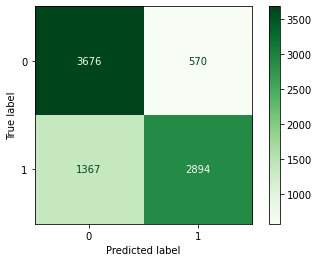

In [ ]:
# XGB Classifier
xgbm_bin = xgb.sklearn.XGBClassifier(learning_rate=0.1, 
                                  n_estimators=800, 
                                  nthread=10,
                                  max_depth=18, 
                                  subsample=0.9, 
                                  colsample_bytree=0.9)

xgbm_bin.fit(X_train, y_train)


# Plotting confusion matrix for categorical features
plot_confusion_matrix(xgbm_bin, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(xgbm_bin.predict(X_test), y_test)

0.772305160456095

### Experimenting on telecommuting feature in binary categorical data:

In [ ]:
# dropping telecommuting feature and checking the model performance.
X_res = X_res.drop(["telecommuting"], axis = 1)

# Splitting the data after removing telecommuting feature
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

#### Logistic Regression when telecommuting feature removed from binary categorical features:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


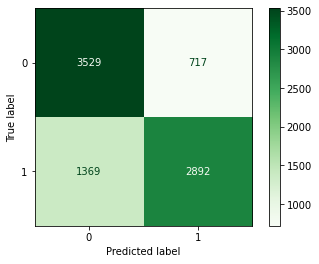

In [ ]:
# Modelling the logistic regression after removing telecommuting feature
log_bin = LogisticRegression(random_state=50 ,solver = 'liblinear')
log_bin.fit(X_train, y_train)

# Plotting confusion matrix for the binary categorical data after removing telecommuting feature
plot_confusion_matrix(log_bin, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(log_bin.predict(X_test), y_test)

0.7547901727988715

#### RandomForest Classifier when telecommuting feature removed from binary categorical features:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.4s finished
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


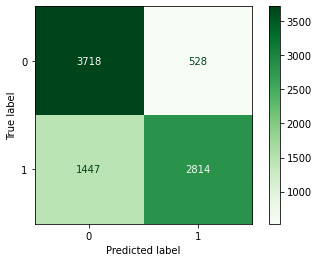

In [ ]:
# Random Forest Classifier
rfc_bin = RandomForestClassifier(n_estimators = 1000, 
                             criterion='gini', 
                             max_depth=18, 
                             random_state=0, 
                             verbose=1)
rfc_bin.fit(X_train, y_train)

# Plotting confusion matrix for RandomForest classifier
plot_confusion_matrix(rfc_bin, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(rfc_bin.predict(X_test), y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


0.7678382508522393

#### XGBoost Classifier when telecommuting feature removed from binary categorical features:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


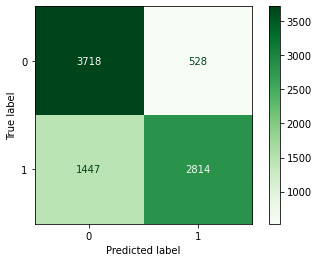

In [ ]:
# XGB Classifier
xgbm_bin = xgb.sklearn.XGBClassifier(learning_rate=0.1, 
                                  n_estimators=800, 
                                  nthread=10,
                                  max_depth=18, 
                                  subsample=0.9, 
                                  colsample_bytree=0.9)

xgbm_bin.fit(X_train, y_train)


# Plotting confusion matrix for categorical features
plot_confusion_matrix(xgbm_bin, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(xgbm_bin.predict(X_test), y_test)

0.7678382508522393

Experimenting on binary categorical data was done. The accuracies doesn't look good. Carrying forward on considering all the categorical features.

#### Converting textual data of categorical data into numerical categorical data:

In [ ]:
# Converting textual categorical features into numerical categorical features using Label Encoder
le = LabelEncoder()
data_cat[["employment_type", "required_experience", "required_education", "function", "industry", "salary_range", 
          "department", "location"]] = data_cat[["employment_type", "required_experience", "required_education", "function", 
                                                 "industry", "salary_range", "department", "location"]].apply(le.fit_transform)


In [ ]:
data_cat.head()

,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,bin_company_profile
0,2536,758,872,0,1,0,3,4,6,88,22,0,1
1,1073,1162,872,0,1,0,1,6,6,75,7,0,1
2,1868,831,872,0,1,0,2,7,6,88,23,0,1
3,1704,1055,872,0,1,0,1,5,1,22,32,0,1
4,1742,831,872,0,1,1,1,5,1,51,16,0,1


### Dropping telecommuting, salary_range and department from the dataset and checking performances:

In [ ]:
data_catr = data_cat.drop(["department", "salary_range", "telecommuting"], axis = 1)

In [ ]:
data_catr.head()

,location,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,bin_company_profile
0,2536,1,0,3,4,6,88,22,0,1
1,1073,1,0,1,6,6,75,7,0,1
2,1868,1,0,2,7,6,88,23,0,1
3,1704,1,0,1,5,1,22,32,0,1
4,1742,1,1,1,5,1,51,16,0,1


In [ ]:
# Splitting all categorical features into inputs and output 
X = data_catr.drop(["fraudulent"], axis = 1)
y = data_catr["fraudulent"]

# Applying SMOTE for the categorical features
sm = SMOTE(random_state=0)
X_catr, y_catr = sm.fit_resample(X, y)

In [ ]:
X_catr["bin_company_profile"] = X_catr["bin_company_profile"].astype(int)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_catr, y_catr, test_size=0.25, random_state=0)

#### Logistic Regression for categorical features without some features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


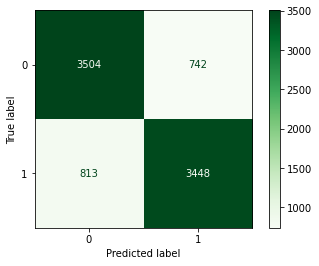

In [ ]:
# Logistic Regression for the categorical features
log = LogisticRegression(C = 0.01, penalty = 'l2', random_state=50 ,solver = 'liblinear')
log.fit(X_train, y_train)

# Plotting confusion matrix for categorical features
plot_confusion_matrix(log, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(log.predict(X_test), y_test)

0.8172093570001175

#### Random Forest Classifier for categorical features without some features:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.2s finished
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


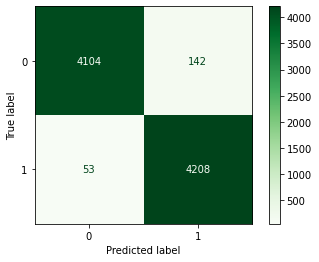

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 1000, 
                             criterion='gini', 
                             max_depth=18, 
                             random_state=0, 
                             verbose=1)
rfc.fit(X_train, y_train)

# Plotting confusion matrix for RandomForest classifier
plot_confusion_matrix(rfc, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(rfc.predict(X_test), y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


0.9770777007170566

#### XGBoost Classifier for categorical features without some features:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


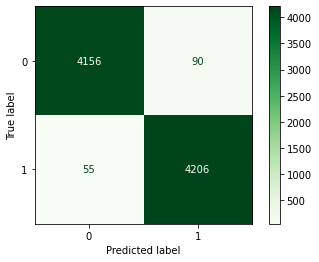

In [ ]:
# XGB Classifier
xgbm = xgb.sklearn.XGBClassifier(learning_rate=0.1, 
                                  n_estimators=800, 
                                  nthread=10,
                                  max_depth=18, 
                                  subsample=0.9, 
                                  colsample_bytree=0.9)

xgbm.fit(X_train, y_train)


# Plotting confusion matrix for categorical features
plot_confusion_matrix(xgbm, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(xgbm.predict(X_test), y_test)

0.9829552133537087

### Considering all the categorical features:

In [ ]:
# Splitting all categorical features into inputs and output 
X = data_cat.drop(["fraudulent"], axis = 1)
y = data_cat["fraudulent"]

# Applying SMOTE for the categorical features
sm = SMOTE(random_state=0)
X_cat, y_cat = sm.fit_resample(X, y)

In [ ]:
X_cat["bin_company_profile"] = X_cat["bin_company_profile"].astype(int)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.25, random_state=0)

#### Logistic Regression for all the categorical variables:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


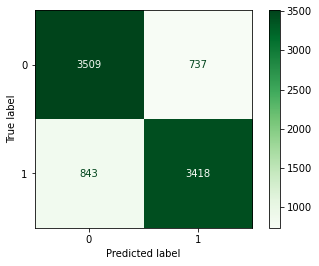

In [ ]:
# Logistic Regression for the categorical features
log = LogisticRegression(C = 0.01, penalty = 'l2', random_state=50 ,solver = 'liblinear')
log.fit(X_train, y_train)

# Plotting confusion matrix for categorical features
plot_confusion_matrix(log, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(log.predict(X_test), y_test)

0.8142706006817915

#### RandomForest Classifier for all the categorical variables:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.5s finished
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


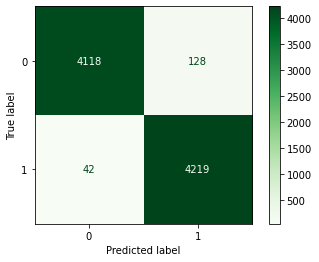

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 1000, 
                             criterion='entropy', 
                             max_depth=18, 
                             random_state=0, 
                             verbose=1,
                             warm_start = True)
rfc.fit(X_train, y_train)

# Plotting confusion matrix for RandomForest classifier
plot_confusion_matrix(rfc, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(rfc.predict(X_test), y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


0.9800164570353826

#### XGBoost Classifier for all the categorical variables:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


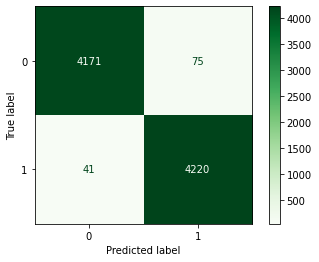

In [ ]:
# XGB Classifier
xgbm = xgb.sklearn.XGBClassifier(learning_rate=0.1, 
                                  n_estimators=800, 
                                  nthread=10,
                                  max_depth=18, 
                                  subsample=0.9, 
                                  colsample_bytree=0.9)

xgbm.fit(X_train, y_train)


# Plotting confusion matrix for categorical features
plot_confusion_matrix(xgbm, X_test, y_test, cmap = "Greens")

In [ ]:
accuracy_score(xgbm.predict(X_test), y_test)

0.986364170682967

## **Part 3: NLP Classifiers + Performance Assessment**

Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can

In [ ]:
# Load Packages
import pandas as pd
from nltk.tokenize import RegexpTokenizer
default_tokenizer=RegexpTokenizer(r"\w+")

# Setting Column Width as None, to show full column values
pd.set_option('display.max_colwidth', None)

# Read the Dataset and Fetch a sample Description Columns
data = pd.read_csv('fake_job_postings.csv')
sample_description = data.loc[data['job_id'] == 1]['description'][0]
print("Description Sample: ", sample_description)

# Example for Converting to Tokens and Printing
print("Tokens Sample: ", default_tokenizer.tokenize(sample_description))

Description Sample:  Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff
Tokens Sample:  ['Food52', 'a', 'fast', 'growing', 'James', 'Beard', 'Awa

In [ ]:
# Load Packages
from nltk.stem.porter import PorterStemmer
default_stemmer = PorterStemmer()

# Printing the Text, Tokens and Stemmed Text
print("Description Sample: ", sample_description)
print("Tokens Sample:", default_tokenizer.tokenize(sample_description))
print("Stemmed String: ", ' '.join([default_stemmer.stem(t) for t in default_tokenizer.tokenize(sample_description)]))

Description Sample:  Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff
Tokens Sample: ['Food52', 'a', 'fast', 'growing', 'James', 'Beard', 'Awar

In [ ]:
# Load Packages 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
default_stopwords = stopwords.words('english')

# Getting the Stemmed Text
stemmed_text = ' '.join([default_stemmer.stem(t) for t in default_tokenizer.tokenize(sample_description)])
print("Stemmed String: ", stemmed_text)
# Iterating over tokenized Stemmed Text and removing Stop Words.
stop_words_clean_text = [w for w in default_tokenizer.tokenize(stemmed_text) if w not in default_stopwords]
print("Stop Words Cleaned Text: ", stop_words_clean_text)


Stemmed String:  food52 a fast grow jame beard award win onlin food commun and crowd sourc and curat recip hub is current interview full and part time unpaid intern to work in a small team of editor execut and develop in it new york citi headquart reproduc and or repackag exist food52 content for a number of partner site such as huffington post yahoo buzzfe and more in their variou content manag systemsresearch blog and websit for the provis by food52 affili programassist in day to day affili program support such as screen affili and assist in ani affili inquiriessupport with pr amp event when neededhelp with offic administr work such as file mail and prepar for meetingswork with develop to document bug and suggest improv to the sitesupport the market and execut staff
Stop Words Cleaned Text:  ['food52', 'fast', 'grow', 'jame', 'beard', 'award', 'win', 'onlin', 'food', 'commun', 'crowd', 'sourc', 'curat', 'recip', 'hub', 'current', 'interview', 'full', 'part', 'time', 'unpaid', 'intern

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Loading Packages
import numpy as np 
import pandas as pd
import re 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Initiating Variables
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer = RegexpTokenizer(r"\w+")

# Loading DataSet
data = pd.read_csv('fake_job_postings.csv')

# Extracting Text Features
data = data.replace(np.nan, '', regex=True)
text_data = data[['title', 'company_profile', 'description', 'requirements', 'benefits']] 

In [ ]:
# Function to do Tokenization, Stemming, Removing Stop Words and Data Cleaning
def clean_text(text, ):
        # Text Cleaning Steps
        if text is not None:
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
                text = re.sub('\[[^]]*\]', '', text)
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)
        # Tokenization Step
        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        # Removing Stop Words Step
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)
        # Stemming the Text Step
        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text)
        text = remove_stopwords(text) 

        return text

In [ ]:
# Processing Each Individual Text Column in Data
text_data['title'] = text_data['title'].apply(clean_text)
text_data['company_profile'] = text_data['company_profile'].apply(clean_text)
text_data['description'] = text_data['description'].apply(clean_text)
text_data['requirements'] = text_data['requirements'].apply(clean_text)
text_data['benefits'] = text_data['benefits'].apply(clean_text)

**TF-IDF Vectorization Example**
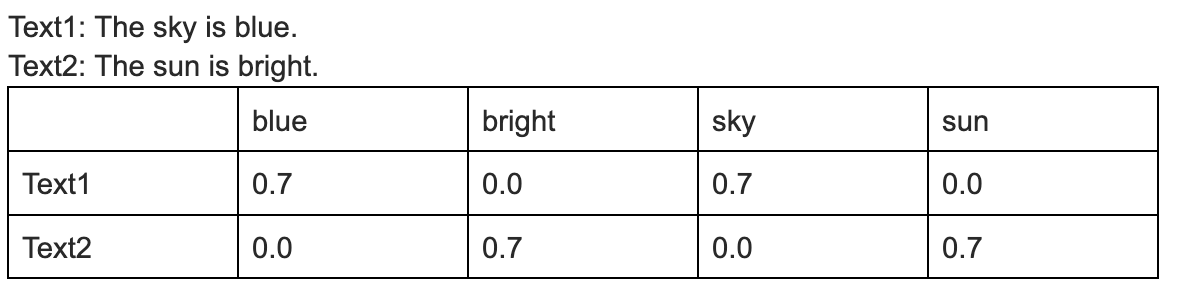


In [ ]:
# Example Cell
# Converting Textual Information to Numerical Features.
# Vectorization of Data
from sklearn.feature_extraction.text import TfidfVectorizer
# Max Features keeping a value big enough to accomodate all unique words
cv = TfidfVectorizer(max_features = 1000)
x = cv.fit_transform(text_data['title'])
df_title = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Appending all the Columns into a Single Column
text_data_single_column = text_data[['title', 'company_profile','description','requirements','benefits']].apply(lambda x: ' '.join(x), axis = 1) 
text_data_single_column = text_data_single_column.to_frame()

In [ ]:
# TF-IDF Vectorization
# max_features = no of maximum words allowed in the Corpus
tf_idf_fit = TfidfVectorizer(max_features = 1000)
# renaming column for consistency
text_data_single_column = text_data_single_column.rename(columns = {text_data_single_column.columns[0]: 'text'})
# Fitting the data
temp_results = tf_idf_fit.fit_transform(text_data_single_column['text'])
# Converting the results to a Dataframe
temp_df = pd.DataFrame(temp_results.toarray(), columns=cv.get_feature_names_out())
X_Dataframae = temp_df

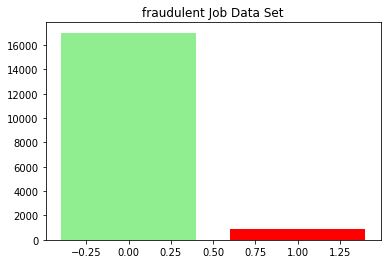

In [ ]:
# Generating our X and Y Values
Y = data.iloc[:,-1]
X = X_Dataframae

# Load Library
import matplotlib.pyplot as plt
plt.bar(Y.unique(), Y.value_counts(), color = ['lightgreen', 'red'])
 
plt.title("fraudulent Job Data Set")
plt.show()

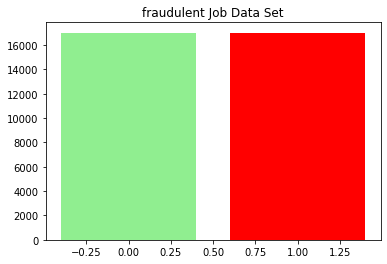

In [ ]:
# Load Library
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Using SMOTE to oversample the minority class
# Selecting a random_state to re-run the code without any issues
smk  = SMOTE(random_state=0)
# Saving the results into X_result and Y_result
X_result,Y_result = smk.fit_resample(X,Y)


# Plotting the Graph to demonstrate the resuls after using SMOTE
plt.bar(Y_result.unique(), Y_result.value_counts(), color = ['lightgreen', 'red'])
 
plt.title("fraudulent Job Data Set")
plt.show()


In [ ]:
# Load Library
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_result, Y_result, test_size=0.25, random_state=0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


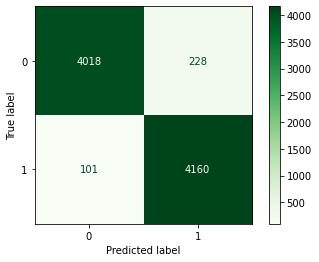

In [ ]:
# Load Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Fitting the Model
Logistic_Regression_Model = LogisticRegression(random_state=0, verbose=1).fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Logistic_Regression_Model, X_test, y_test, cmap='Greens')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


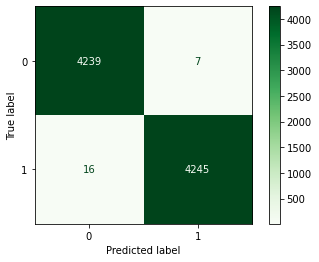

In [ ]:
# Load Library
from sklearn.ensemble import RandomForestClassifier

# Fitting the Model
Random_Forest_Model = RandomForestClassifier(random_state=0, verbose=1).fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Random_Forest_Model, X_test, y_test, cmap='Greens')

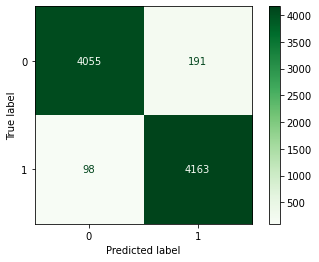

In [ ]:
# Load Library
from sklearn.tree import DecisionTreeClassifier

# Fitting the Model
Decision_Tree_Model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Decision_Tree_Model, X_test, y_test, cmap='Greens')

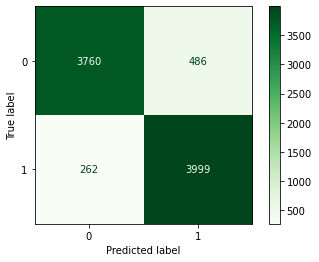

In [ ]:
# Load Library
from sklearn.naive_bayes import GaussianNB

# Fitting the Model
Gaussion_NB_Model = GaussianNB().fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Gaussion_NB_Model, X_test, y_test, cmap='Greens')

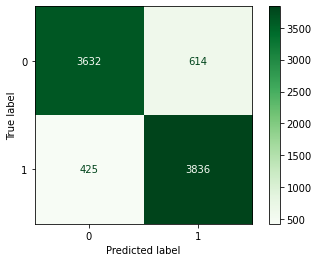

In [ ]:
# Load Library
from sklearn.naive_bayes import MultinomialNB

# Fitting the Model
Multinomial_NB_Model = MultinomialNB().fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Multinomial_NB_Model, X_test, y_test, cmap='Greens')

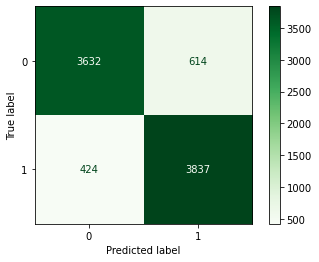

In [ ]:
# Load Library
from sklearn.naive_bayes import ComplementNB

# Fitting the Model
Complement_NB_Model = ComplementNB().fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Complement_NB_Model, X_test, y_test, cmap='Greens')

In [ ]:
# Load Library
from sklearn.neural_network import MLPClassifier

MLP_LBFGS_Model = MLPClassifier(solver='lbfgs', activation = 'relu', hidden_layer_sizes = (100,50,30), max_iter = 1000, verbose=1)
MLP_LBFGS_Model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000, solver='lbfgs',
              verbose=1)

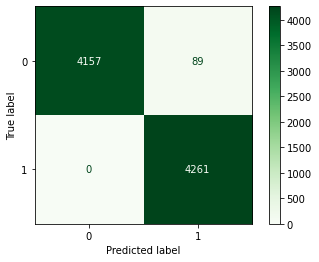

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(MLP_LBFGS_Model, X_test, y_test, cmap='Greens')

In [ ]:
# Load Library
from sklearn.neural_network import MLPClassifier

MLP_ADAM_Model = MLPClassifier(solver='adam', activation = 'relu', hidden_layer_sizes = (100,50,30), max_iter = 1000, verbose=1)
MLP_ADAM_Model.fit(X_train, y_train)

Iteration 1, loss = 0.34069877
Iteration 2, loss = 0.06652752
Iteration 3, loss = 0.02989732
Iteration 4, loss = 0.01258112
Iteration 5, loss = 0.00604102
Iteration 6, loss = 0.00366924
Iteration 7, loss = 0.00275789
Iteration 8, loss = 0.00191182
Iteration 9, loss = 0.00146409
Iteration 10, loss = 0.00124721
Iteration 11, loss = 0.00069517
Iteration 12, loss = 0.00106224
Iteration 13, loss = 0.00070849
Iteration 14, loss = 0.00071056
Iteration 15, loss = 0.00033264
Iteration 16, loss = 0.00043976
Iteration 17, loss = 0.00025521
Iteration 18, loss = 0.00024199
Iteration 19, loss = 0.00021135
Iteration 20, loss = 0.00019762
Iteration 21, loss = 0.00018954
Iteration 22, loss = 0.00017358
Iteration 23, loss = 0.00016444
Iteration 24, loss = 0.00016112
Iteration 25, loss = 0.00015898
Iteration 26, loss = 0.00015775
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000, verbose=1)

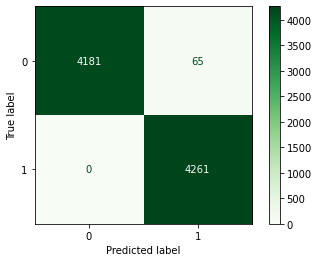

In [ ]:
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(MLP_ADAM_Model, X_test, y_test, cmap='Greens')

In [ ]:
# Load Libary
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy_score_list = []
# TF-IDF Vectorization
for i in range(1, 10):
  tf_idf_fit = TfidfVectorizer(max_features = i*1000)
  temp_results = tf_idf_fit.fit_transform(text_data_single_column['text'])
  X_Dataframae = temp_results

  Y = data.iloc[:,-1]
  X = X_Dataframae


  smk  = SMOTE(random_state=0)
  X_result,Y_result = smk.fit_resample(X,Y)
  X_train, X_test, y_train, y_test = train_test_split(X_result, Y_result, test_size=0.25, random_state=0)


  Random_Forest_Model = RandomForestClassifier(random_state=0, verbose=1).fit(X_train, y_train)
  accuracy_score_list.append(accuracy_score(y_test, Random_Forest_Model.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   56.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

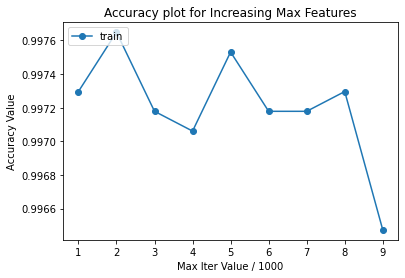

In [ ]:
# Accuracy Plot
plt.plot(range(1, len(accuracy_score_list) + 1), accuracy_score_list, marker='o', label='train')
plt.title('Accuracy plot for Increasing Max Features')
plt.xlabel('Max Iter Value / 1000')
plt.legend(loc="upper left")
plt.ylabel('Accuracy Value')
plt.show()

In [ ]:
tf_idf_fit = TfidfVectorizer(max_features = 2000)
temp_results = tf_idf_fit.fit_transform(text_data_single_column['text'])
X_Dataframae = temp_results

Y = data.iloc[:,-1]
X = X_Dataframae


smk  = SMOTE(random_state=0)
X_result,Y_result = smk.fit_resample(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X_result, Y_result, test_size=0.25, random_state=0)

In [ ]:
# Tuning MLP Classifier
MLP_ADAM_Model = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,50,30), (100,50,30, 20), (500,100,50, 10), (1000,500,100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(MLP_ADAM_Model, parameter_space, n_jobs=-1, cv=5)
grid_search.fit(X_train[:100], y_train[:100])

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 50, 30),
                                                (100, 50, 30, 20),
                                                (500, 100, 50, 10),
                                                (1000, 500, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05,
              hidden_layer_sizes=(500, 100, 50, 10), learning_rate='adaptive',
              max_iter=100)

Iteration 1, loss = 0.15846408
Iteration 2, loss = 0.01270513
Iteration 3, loss = 0.00432139
Iteration 4, loss = 0.00214260
Iteration 5, loss = 0.00197187
Iteration 6, loss = 0.00161018
Iteration 7, loss = 0.00158424
Iteration 8, loss = 0.00135293
Iteration 9, loss = 0.00142757
Iteration 10, loss = 0.00072730
Iteration 11, loss = 0.00120419
Iteration 12, loss = 0.00071631
Iteration 13, loss = 0.00058579
Iteration 14, loss = 0.00045114
Iteration 15, loss = 0.00042948
Iteration 16, loss = 0.00041238
Iteration 17, loss = 0.00040142
Iteration 18, loss = 0.00039236
Iteration 19, loss = 0.00038392
Iteration 20, loss = 0.00037562
Iteration 21, loss = 0.00036704
Iteration 22, loss = 0.00035862
Iteration 23, loss = 0.00035028
Iteration 24, loss = 0.00034195
Iteration 25, loss = 0.00033359
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


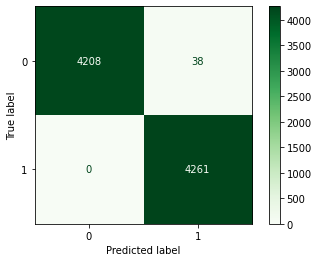

In [ ]:
# Load Library
from sklearn.neural_network import MLPClassifier

MLP_ADAM_Model = MLPClassifier(solver='adam', activation = 'relu', hidden_layer_sizes=(500, 100, 50, 10), max_iter = 1000, verbose=1)
MLP_ADAM_Model.fit(X_train, y_train)
# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(MLP_ADAM_Model, X_test, y_test, cmap='Greens')

In [ ]:

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=MLP_ADAM_Model.predict(X_test)))

Accuracy:  0.9955330903961443


In [ ]:
# End of Part 3!

## **Part 4: Model Ensembling**

In [ ]:
# Loading Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier
estimators = [('lr', LogisticRegression(C = 0.01, penalty = 'l2', random_state=50 ,solver = 'liblinear')),
              ('rf', RandomForestClassifier(n_estimators = 1000, criterion='entropy', max_depth=18, random_state=0,  verbose=1,  warm_start = True)),
              ('xgb', xgb.sklearn.XGBClassifier(learning_rate=0.1, n_estimators=800, nthread=10, max_depth=18, subsample=0.9, colsample_bytree=0.9))
              ]

In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset, delete the "job_id" column and replace any missing values in the data with "Not listed"
data = pd.read_csv("fake_job_postings.csv")
data = data.drop(columns=["job_id"])
data = data.replace(np.nan, "Not Listed")

In [ ]:
# Create binary version of company_profile:
data["bin_company_profile"] = data["company_profile"]
data.loc[data["bin_company_profile"] == "Not Listed", "bin_company_profile"] = 0
data.loc[data["bin_company_profile"] != 0, "bin_company_profile"] = 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_cat = data.drop(["title", "company_profile", "description", "requirements", "benefits"], axis = 1)
# Converting textual categorical features into numerical categorical features using Label Encoder
le = LabelEncoder()
data_cat[["employment_type", "required_experience", "required_education", "function", "industry", "salary_range", 
          "department", "location"]] = data_cat[["employment_type", "required_experience", "required_education", "function", 
                                                 "industry", "salary_range", "department", "location"]].apply(le.fit_transform)

In [ ]:
# Stacking Classifiers
# Final Estimator - Logistic Regression Default
Stacking_Model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), verbose=1)

In [ ]:
# Splitting the inputs and output of the binary categorical data.
X_Part_2 = data_cat.drop(["fraudulent"], axis = 1)
Y_Part_2 = data_cat["fraudulent"]

smk  = SMOTE(random_state=0)
# Saving the results into X_result and Y_result
X_result_Part_2,Y_result_Part_2 = smk.fit_resample(X_Part_2,Y_Part_2)
X_result_Part_2["bin_company_profile"] = X_result_Part_2["bin_company_profile"].astype(int)

# Splitting the binary categorical data into training and testing dataset
X_train_Part_2, X_test_Part_2, y_train_Part_2, y_test_Part_2 = train_test_split(X_result_Part_2, Y_result_Part_2, test_size=0.25, random_state=0)


In [ ]:
Stacking_Model.fit(X_train_Part_2, y_train_Part_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   33.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Pa

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.01, random_state=50,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=18,
                                                       n_estimators=1000,
                                                       random_state=0,
                                                       verbose=1,
                                                       warm_start=True)),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.9,
                                              max_depth=18, n_estimators=800,
                                              nthread=10, subsample=0.9))],
                   final_estimator=LogisticRegression(), verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


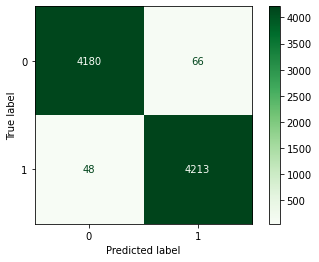

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(Stacking_Model, X_test_Part_2, y_test_Part_2, cmap='Greens')

In [ ]:
# Changing the Final Estimator
# Stacking Classifiers
# Final Estimator - Random Forest Default
Stacking_Model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), verbose=1)
Stacking_Model.fit(X_train_Part_2, y_train_Part_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Pa

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.01, random_state=50,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=18,
                                                       n_estimators=1000,
                                                       random_state=0,
                                                       verbose=1,
                                                       warm_start=True)),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.9,
                                              max_depth=18, n_estimators=800,
                                              nthread=10, subsample=0.9))],
                   final_estimator=RandomForestClassifier(), verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


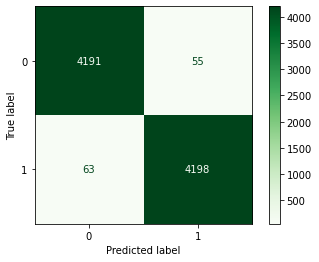

In [ ]:
# Best Stacked Model on Categorical Data
ConfusionMatrixDisplay.from_estimator(Stacking_Model, X_test_Part_2, y_test_Part_2, cmap='Greens')

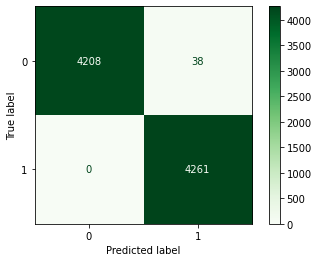

In [ ]:
# Best MLP Model on Text Data
ConfusionMatrixDisplay.from_estimator(MLP_ADAM_Model, X_test, y_test, cmap='Greens')

In [ ]:
# Getting Outputs
y_pred_mlp = MLP_ADAM_Model.predict(X_test)
y_pred_mlp_prob = MLP_ADAM_Model.predict_proba(X_test)
y_pred_stacked = Stacking_Model.predict(X_test_Part_2)
y_pred_stacked_prob = Stacking_Model.predict(X_test_Part_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


In [ ]:
# Hypertuning the Ensembled Model
val = 0.900000
accuracy_list = []
val_list = []
while val < 0.99999999:
  y_pred_final = []
  for idx in range(len(y_pred_mlp)):
    if y_pred_mlp[idx] == 0:
      y_pred_final.append(0)
    else:
      mlp_prob = y_pred_mlp_prob[idx]
      stacked_prob = y_pred_stacked_prob[idx]
      if(mlp_prob[1] > val):
        y_pred_final.append(1)
      else:
        y_pred_final.append(stacked_prob)
  val = val + 0.000005
  accuracy_list.append(accuracy_score(y_pred=y_pred_final, y_true=y_test))
  val_list.append(val)

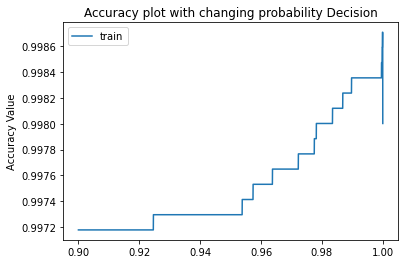

In [ ]:
# Plotting Hyperparameter Value Update Graph
plt.plot(val_list, accuracy_list, label='train')
plt.title('Accuracy plot with changing probability Decision')
plt.legend(loc="upper left")
plt.ylabel('Accuracy Value')
plt.show()

In [ ]:
# Calculations of Predictions
y_pred_final = []
count = 0
for idx in range(len(y_pred_mlp)):
  if y_pred_mlp[idx] == 0:
    y_pred_final.append(0)
  else:
    mlp_prob = y_pred_mlp_prob[idx]
    stacked_prob = y_pred_stacked_prob[idx]
    # print("Prob: ", format(mlp_prob[0], 'f'), "and ", format(mlp_prob[1], 'f'), ", ", stacked_prob)
    if(mlp_prob[1] > 0.99995):
      y_pred_final.append(1)
    else:
      y_pred_final.append(stacked_prob)
    if(stacked_prob == 0):
      count = count + 1
      # print("Prob: ", format(mlp_prob[0], 'f'), "and ", format(mlp_prob[1], 'f'), ", ", stacked_prob)
print("Count: ", count)

Count:  97


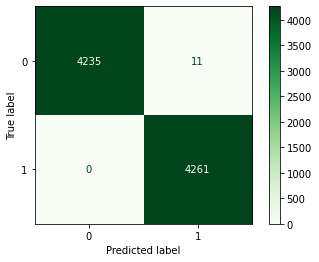

In [ ]:
from matplotlib.cm import cmaps_listed
# Load Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap="Greens")

In [ ]:
print("Accuracy Score: ", accuracy_score(y_pred=y_pred_final, y_true=y_test))

Accuracy Score:  0.9987069472199365


## **Part 5: Video Demonstration Content**

**Outline of the Project**
 
**Introduction and Data Introduction**
 
The problem Statement is to Classify Jobs into Fraudulent and Not Fraudulent.
The dataset we used was from Kaggle.
Our team consists of 3 Members. Ram Yogesh Kolli, Anshul Shivhare, and Paloma Almodovar Gonzalez
 
**EDA Results**
 
During EDA we explored the Dataset and figured out the imbalance in the dataset also discussed how to overcome this and explored individual features as well.
 
**Categorical Classification Models Results**
 
We used only the Categorical Dataset. We tried to do the feature selection required to do the performance assessment and Best Results we got were from XG Boost after using all the catgorical features. Please note that we are using the Confusion Matrix as a Performance Criterion due to an Imbalance in the Dataset and we mostly focused on False Negatives and False Positives. The results are present in the Code.
 
**NLP Models Performance Results**
 
For this part, we used all the Text Information and Features available in the Dataset. We performed NLP Techniques on them and trained Classification Models on this Dataset. The best results we got were from Multi-Layer Perceptron Algorithm with Adam Solver. The results are present in the Code. Please note that we also did Hyperparameter tuning to select the best parameters.
 
**Ensemble Graph Explanation and Results**
 
For the ensemble, we need to explain the Flow Charts. Firstly the Stacked Model for Categorical Dataset,  and then we moved to Ensemble our Categorial Model with our NLP Model.
<br>1.
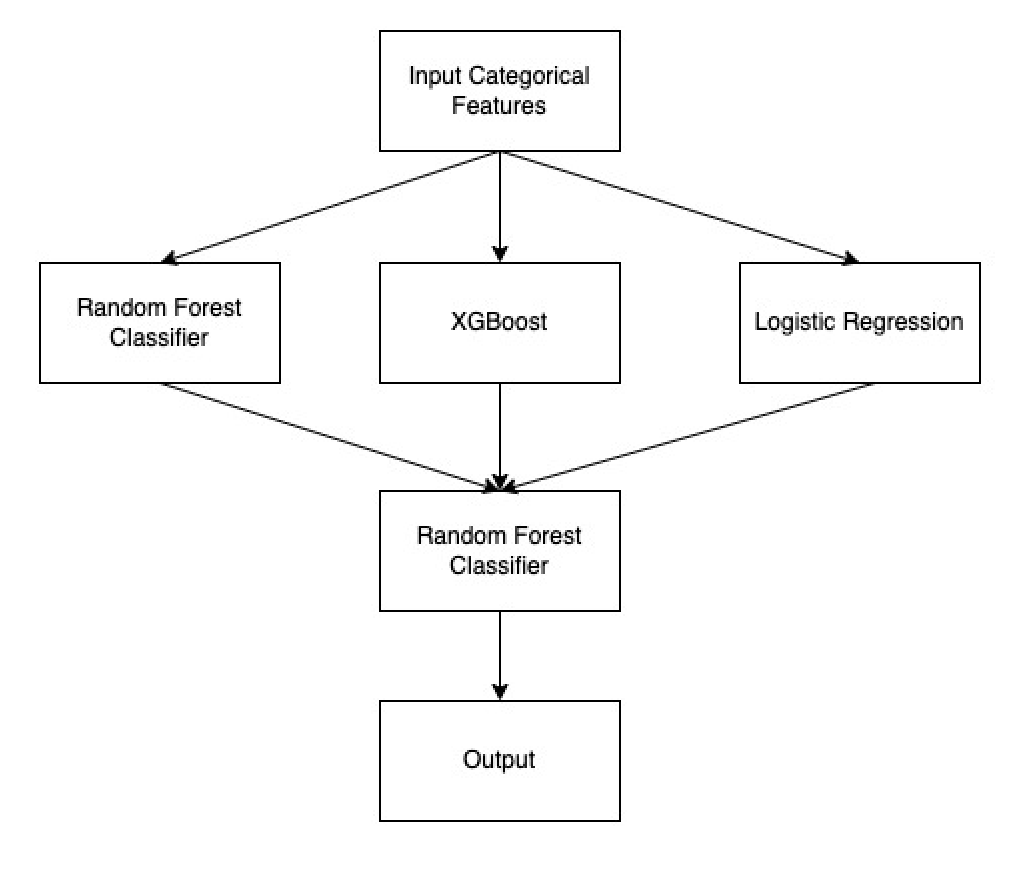

<br>2.<br>
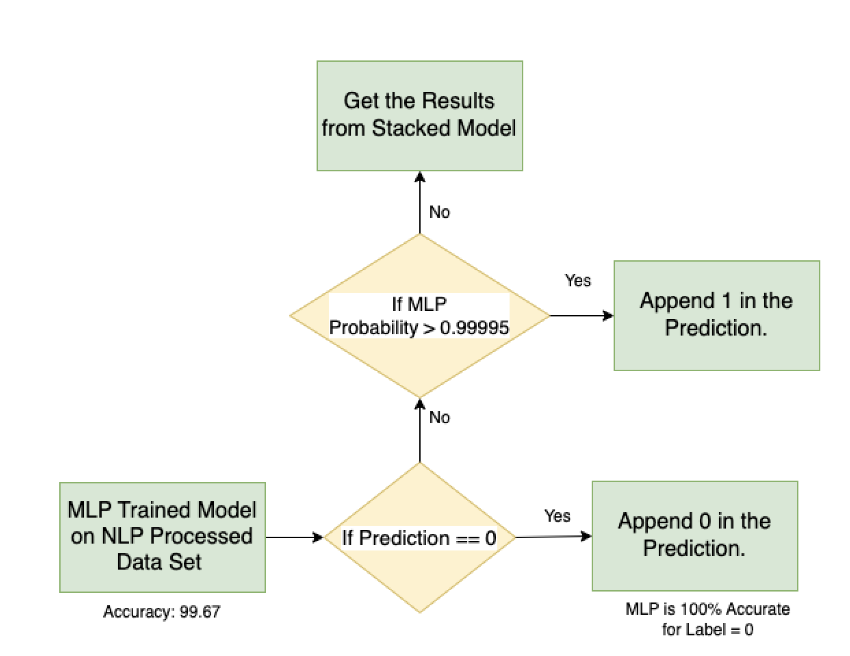 

**Conclusion**
 
In a conclusion, we were able to achieve 99.8% using our Ensemble technique and we were also able to reduce our False Negatives to 0.
 
Thank You.